<a href="https://colab.research.google.com/github/aryansingh12/tensorflow-keras/blob/master/auto_encoder_aryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print(5)

5


Using TensorFlow backend.


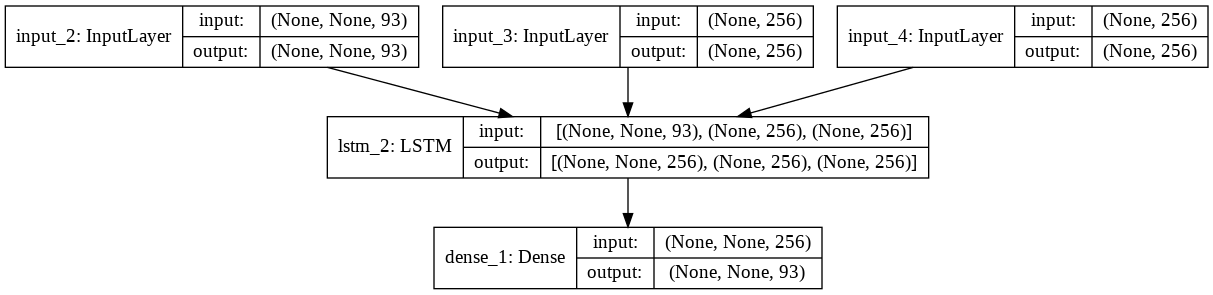

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


# configure
num_encoder_tokens = 71
num_decoder_tokens = 93
latent_dim = 256

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# plot the model
plot_model(model, to_file='model.png', show_shapes=True)

# define encoder inference model
encoder_model = Model(encoder_inputs, encoder_states)

# define decoder inference model
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

# summarize model
plot_model(encoder_model, to_file='encoder_model.png', show_shapes=True)
plot_model(decoder_model, to_file='decoder_model.png', show_shapes=True)

In [0]:
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(10,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

model.fit(x,y,epochs=10, batch_size=32)

In [0]:
import keras
from keras import layers

inputs = keras.Input(shape = (10,))
x = layers.Dense(20, activation='relu', input_shape=(10,))(x)
y = layers.Dense(20, activation='relu')(x)
outputs = layers.Dense(20, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.fit(x,y,epochs=10, batch_size=32)

In [0]:
import keras
from keras import layers

class MyModel():
    # initializing variables, idk where to store them
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(20, activation='relu')
        self.dens2 = layers.Dense(20, activation='relu')
        self.dense3 = layers.Dense(10, activation='softmax')
    
    def call(self, inputs):
        x = self.dense1(x)
        x = self.dense2(x)
        return dense3(x)
        
        

model = MyModel()
model.fit(x,y,epochs=10, batch_size=32)

ls -l|wc -l
autoencoder for the system
17000 vectors as the input
number of patients are different



In [1]:
import os
import numpy as np
import keras
from keras import layers

Using TensorFlow backend.


In [0]:
def seedy:
    np.random.seed()
    
    
class AutoEncoder:
    def __init__(self, encoding_dim=3):
        self.encoding_dim = encoding_dim
        r = lambda: np.random.randint(1,3)
        self.x = np.array([[r(),r(),r()] for _ in range(1000)])
        print(self.x)
        # self.x is the data = 3 random numbers
        # this is what we train and test and return using the decoder
    
    def _encoder(self):
        inputs = Input(shape=(self.x[0]))
        encoded = Dense(self.encoding_dim), activation='relu'
        model = Model(inputs, encoded)
        self.encoder = model
        return model
    
    def _decoder(self):
        # the shape has to be the same as encoding
        inputs = Input(shape = (self.encoding_dim,))
        decoded = Dense(3)(inputs)
        model = Model(inputs, decoded)
        self.decoder = model
        return model
    
    def encoder_decoder(self):
        ec = self._encoder()
        dc = self._decoder()
        
        inputs = Input(shape=self.x[0].shape)
        ec_out = ec(inputs)
        dc_out = dc(ec_out)
        model = Model(inputs, dc_out)
        
        self.model = model
        return model
    
    